# Space Composite Demonstration

<!-- SUMMARY: Migration of one or several variables from one data organization to another. Particular use of the Ball Tree sorting. -->

<!-- CATEGORY: Data_Base_Management -->

This case study is meant to demonstrate how to use *gstlearn* for defining composit space. The example here uses a space defined for RN(2) + RN(1) (for example, buoys (localized in 2D) that measure sea surface temperature every hour (time in 1D))

In [2]:
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

gdoc.setNoScroll()

<IPython.core.display.Javascript object>

Generate buoys position and temperature measurements

In [3]:
gl.defineDefaultSpace(gl.ESpaceType.RN, 2) # 2D space (water surface)

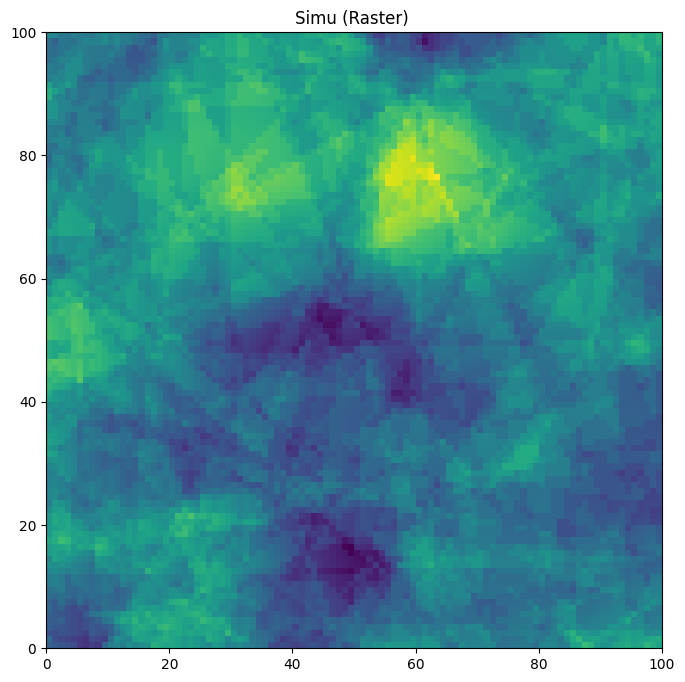

In [4]:
grid = gl.DbGrid.create([100,100], [1, 1])
model = gl.Model.createFromParam(gl.ECov.SPHERICAL, 30., 1.)
gl.simtub(None, grid, model)
gp.plot(grid)

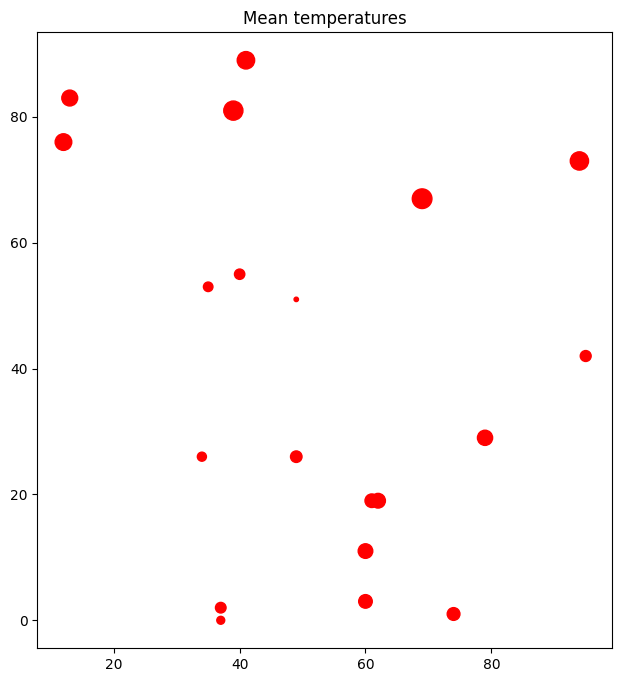

In [25]:
nbuoys = 20
buoys = gl.Db.createSamplingDb(grid, 0., nbuoys, ["x1","x2","Simu"])
gp.plot(buoys, nameSize="Simu")
plt.title("Mean temperatures")
plt.show()

,x,y,t,v
0,61.0,19.0,0,3.981797
1,61.0,19.0,1,3.966204
2,61.0,19.0,2,3.925943
3,61.0,19.0,3,3.541821
4,61.0,19.0,4,3.472625
...,...,...,...,...
2875,94.0,73.0,139,3.403110
2876,94.0,73.0,140,3.757755
2877,94.0,73.0,141,3.368225
2878,94.0,73.0,142,4.268668


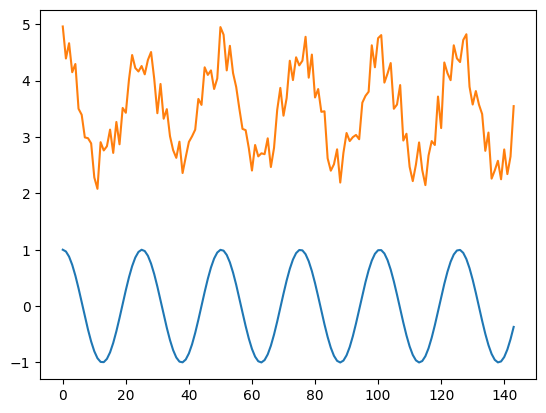

In [26]:
ntimes = 24*6 # 6 days
t = np.arange(0, ntimes)
ct = np.cos(t*6/24)
plt.plot(t,ct)

rt = [3 + it + np.random.uniform() for it in ct]
plt.plot(t,rt)

x = np.repeat(buoys["x1"], ntimes)
y = np.repeat(buoys["x2"], ntimes)
t = np.tile(t, nbuoys)
v = [iv + 3 + it + np.random.uniform() for iv in buoys["Simu"] for it in ct]
df = pd.DataFrame({"x":x, "y":y, "t":t, "v":v})
df

In [17]:
x

array([61., 61., 61., ..., 94., 94., 94.])

Global parameters.

In [4]:
gl.defineDefaultSpace(gl.ESpaceType.RN, 2, 0., True) # 2D space with time

In [5]:
sp = gl.getDefaultSpace()
sp

Space Type      [1] = RN
Space Dimension [1] = 2
Space Type      [2] = RN
Space Dimension [2] = 1

In [24]:
np.random.seed(123456)
x = [np.random.uniform(100) for i in range(nbuoys)]
y = [np.random.uniform(100) for i in range(nbuoys)]
t = np.arange(0, ntimes)
x = np.tile(x, ntimes)
y = np.tile(y, ntimes)
t = np.repeat(t, nbuoys)
v = [np.random.uniform() for i in range(nbuoys*ntimes)]
df = pd.DataFrame({"x":x, "y":y, "t":t, "v":v})
df

,x,y,t,v
0,87.429987,15.562922,0,0.462354
1,4.294934,76.684760,0,0.871372
2,74.212875,85.523504,0,0.401131
3,11.173584,41.602991,0,0.610588
4,62.701778,43.172834,0,0.117967
...,...,...,...,...
2875,65.146700,65.990938,143,0.727164
2876,77.340157,83.079200,143,0.337266
2877,23.098409,60.928758,143,0.851577
2878,41.116425,36.475049,143,0.962634


Generate initial data set


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 3
Number of Columns            = 4
Total number of samples      = 2880

Variables
---------
Column = 0 - Name = x - Locator = x1
Column = 1 - Name = y - Locator = x2
Column = 2 - Name = t - Locator = x3
Column = 3 - Name = v - Locator = NA


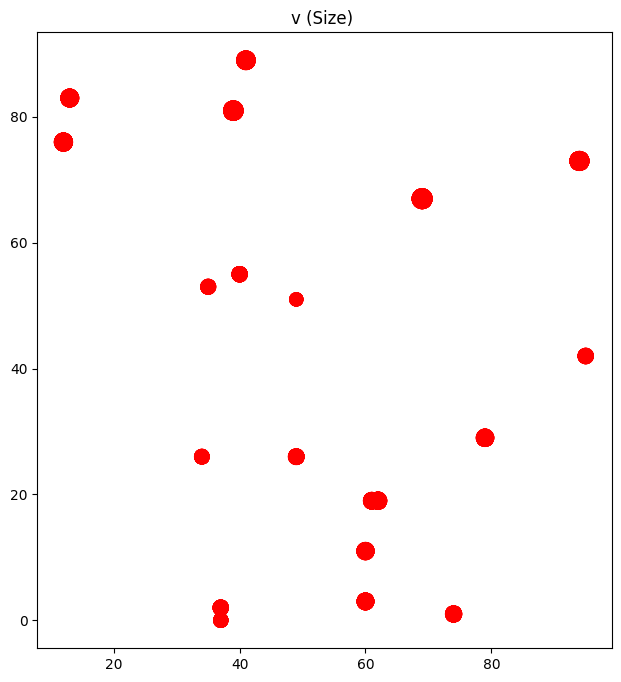

In [29]:
data = gl.Db_fromPanda(df)
data.setLocators(["x", "y", "t"], gl.ELoc.X)
data.setLocators(["x", "y", "t"], gl.ELoc.Z)
data.display()
gp.plot(data, nameSize="v")